In [1]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider
from mlp.penalties import L1Penalty, L2Penalty
import logging
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(model, error, learning_rule, train_data, valid_data,
                                num_epochs, stats_interval, notebook=True, plots=False):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    optimiser = Optimiser(model, error, learning_rule, train_data,
                          valid_data, data_monitors, notebook=notebook)

    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    if plots:
        fig_1 = plt.figure(figsize=(8, 4))
        ax_1 = fig_1.add_subplot(111)
        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                    stats[1:, keys[k]], label=k)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Error')
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        for k in ['acc(train)', 'acc(valid)']:
            ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                    stats[1:, keys[k]], label=k)
        ax_2.legend(loc=0)
        ax_2.set_xlabel('Epoch number')
        ax_2.set_xlabel('Accuracy')
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
    else:
        return stats, keys, run_time

def get_logger (filename = 'logs.log'):
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')
    # logger.handlers = [logging.StreamHandler()]
    # create file handler which logs even debug messages
    fh = logging.FileHandler(filename)
    fh.setLevel(logging.DEBUG)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    return logger

def get_pre_defined_params ():
    seed = 11102019 
    rng = np.random.RandomState(seed)
    batch_size = 100
    logger = get_logger()
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
    learning_rate = 0.001
    num_epochs = 20
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 128
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)  
    return rng, batch_size, train_data, valid_data, learning_rate, stats_interval , input_dim, output_dim, hidden_dim, weights_init, biases_init


logger = get_logger()
rng, batch_size, train_data, valid_data, learning_rate, stats_interval , input_dim,\
     output_dim, hidden_dim, weights_init, biases_init = get_pre_defined_params()
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)


KeysView(<numpy.lib.npyio.NpzFile object at 0x000001F7E27F3100>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x000001F7E27F3400>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

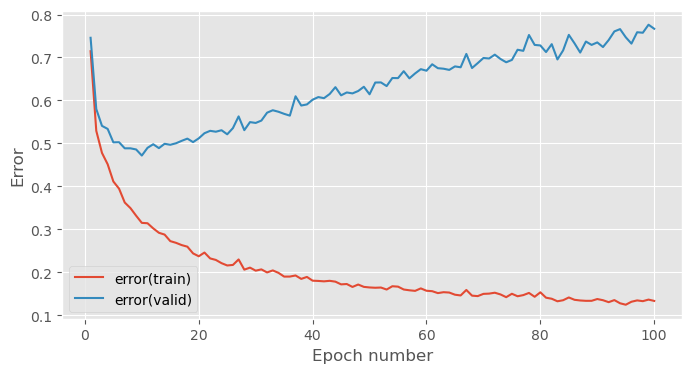

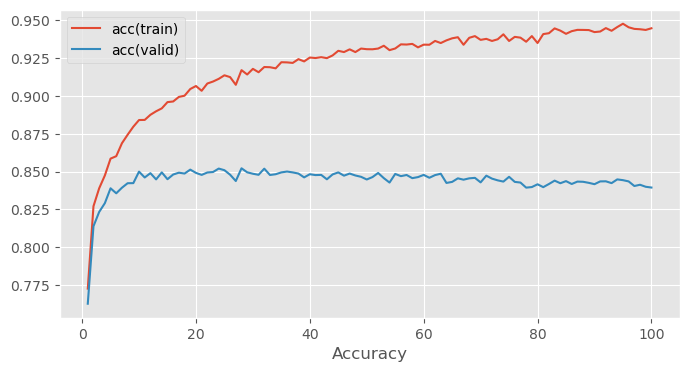

In [2]:
num_epochs = 100
train_data.reset()  
valid_data.reset()  
l1 = None #L1Penalty(0)
l2 = None #L2Penalty(0)
do = DropoutLayer(incl_prob= 0.97)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # first hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # second hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # Third hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2) # output layer
])
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)